In [4]:
pip install statsbombpy streamlit plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
from statsbombpy import sb
competition = sb.competitions()
men_competition = competition[competition['competition_gender']=='male']
men_UEFA_Euro = men_competition[men_competition['competition_name']=='UEFA Euro']

c:\Users\antoi\Documents\Work_Learn\Football\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [8]:
competition

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,281,Germany,1. Bundesliga,male,False,False,2023/2024,2024-07-15T14:15:54.671676,2024-07-15T14:17:00.877356,2024-07-15T14:17:00.877356,2024-07-15T14:15:54.671676
1,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2024-05-19T11:11:14.192381,None,None,2024-05-19T11:11:14.192381
2,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-06-13T07:51:02.452825,None,None,2024-06-13T07:51:02.452825
3,16,4,Europe,Champions League,male,False,False,2018/2019,2024-06-12T07:44:38.559714,2021-06-13T16:17:31.694,None,2024-06-12T07:44:38.559714
4,16,1,Europe,Champions League,male,False,False,2017/2018,2024-02-13T02:35:28.134882,2021-06-13T16:17:31.694,None,2024-02-13T02:35:28.134882
...,...,...,...,...,...,...,...,...,...,...,...,...
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402
70,35,75,Europe,UEFA Europa League,male,False,False,1988/1989,2024-02-12T14:45:05.702250,2021-06-13T16:17:31.694,None,2024-02-12T14:45:05.702250
71,53,106,Europe,UEFA Women's Euro,female,False,True,2022,2024-02-13T13:27:17.178263,2024-02-13T13:30:52.820588,2024-02-13T13:30:52.820588,2024-02-13T13:27:17.178263
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596


In [12]:
competition['competition_name'].str.replace(r'^1\.\s*', '', regex=True).unique()

array(['Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [3]:
men_UEFA_Euro

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500
69,55,43,Europe,UEFA Euro,male,False,True,2020,2024-04-16T12:44:40.558402,2024-04-16T12:47:18.505110,2024-04-16T12:47:18.505110,2024-04-16T12:44:40.558402


In [4]:
competition_id = men_UEFA_Euro['competition_id'].iloc[0]
season_id = men_UEFA_Euro['season_id'].iloc[0]
matches_men_UEFA_Euro = sb.matches(competition_id=competition_id, season_id=season_id)


c:\Users\antoi\Documents\Work_Learn\AI\TextToSpeech\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


In [5]:
matches_men_UEFA_Euro.head(3)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
1,3943043,2024-07-14,22:00:00.000,Europe - UEFA Euro,2024,Spain,England,2,1,available,...,2024-07-15T15:52:24.778809,7,Final,Olympiastadion Berlin,François Letexier,Luis de la Fuente Castillo,Gareth Southgate,1.1.0,2,2
2,3942752,2024-07-09,22:00:00.000,Europe - UEFA Euro,2024,Spain,France,2,1,available,...,2024-07-10T13:01:26.597509,6,Semi-finals,Allianz Arena,Slavko Vinčić,Luis de la Fuente Castillo,Didier Deschamps,1.1.0,2,2


In [14]:
display('https://github.com/luukhopman/football-logos/blob/master/logos/FR1/AS%20Monaco.png')

'https://github.com/luukhopman/football-logos/blob/master/logos/FR1/AS%20Monaco.png'

In [6]:
match_id = 3942819
team = 'England'
team = 'Netherlands'
lineups = sb.lineups(match_id=match_id)[team]
lineups

c:\Users\antoi\Documents\Work_Learn\AI\TextToSpeech\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2988,Memphis Depay,None,10,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
1,3306,Nathan Aké,None,5,Netherlands,[],"[{'position_id': 6, 'position': 'Left Back', '..."
2,3311,Daley Blind,None,17,Netherlands,[],[]
3,3567,Georginio Wijnaldum,None,8,Netherlands,[],[]
4,3669,Virgil van Dijk,None,4,Netherlands,"[{'time': '86:26', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B..."
5,7787,Stefan de Vrij,None,6,Netherlands,[],"[{'position_id': 3, 'position': 'Right Center ..."
6,7829,Wout Weghorst,None,9,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
7,8069,Matthijs de Ligt,None,3,Netherlands,[],[]
8,8125,Denzel Dumfries,None,22,Netherlands,"[{'time': '13:43', 'card_type': 'Yellow Card',...","[{'position_id': 2, 'position': 'Right Back', ..."
9,8259,Steven Bergwijn,None,25,Netherlands,[],[]


In [7]:
lineups['positions'].iloc[1]

[{'position_id': 6,
  'position': 'Left Back',
  'from': '00:00',
  'to': None,
  'from_period': 1,
  'to_period': None,
  'start_reason': 'Starting XI',
  'end_reason': 'Final Whistle'}]

In [8]:
events = sb.events(match_id=match_id)
events

c:\Users\antoi\Documents\Work_Learn\AI\TextToSpeech\.venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Netherlands,941,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 3421, 'lineup': [{'player': {'id...",England,768,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:50:09.942,Half End,NaN
3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:50:09.942,Half End,NaN
3482,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:41:26.052,Bad Behaviour,NaN
3483,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Netherlands,941,00:45:18.606,Bad Behaviour,NaN


In [9]:
events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [10]:
shot_events = events.filter(regex='^(shot|location)').dropna(how='all')
shot_events.head()

,location,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
6,"[60.0, 40.0]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"[30.4, 24.1]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[30.9, 26.7]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"[60.7, 43.3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,"[50.1, 16.3]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
shot_events[shot_events['shot_end_location'].notna()].head()

,location,shot_aerial_won,shot_body_part,shot_deflected,shot_end_location,shot_first_time,shot_freeze_frame,shot_key_pass_id,shot_outcome,shot_statsbomb_xg,shot_technique,shot_type
3440,"[99.6, 51.2]",NaN,Right Foot,NaN,"[120.0, 37.4, 2.0]",NaN,"[{'location': [99.2, 65.4], 'player': {'id': 1...",NaN,Goal,0.048935,Normal,Open Play
3441,"[88.2, 36.6]",NaN,Right Foot,NaN,"[118.3, 37.6, 0.3]",NaN,"[{'location': [85.6, 34.3], 'player': {'id': 2...",4a358d4e-38be-49ad-be11-88be3a5ba2b5,Saved,0.028932,Normal,Open Play
3442,"[104.5, 41.6]",NaN,Left Foot,NaN,"[106.2, 41.7]",NaN,"[{'location': [109.9, 30.6], 'player': {'id': ...",77745ccb-a216-4d78-bd2c-4b0d8459b35b,Blocked,0.071750,Normal,Open Play
3443,"[108.1, 40.0]",NaN,Right Foot,NaN,"[120.0, 36.5, 0.2]",NaN,NaN,NaN,Goal,0.783500,Normal,Penalty
3444,"[117.0, 47.6]",NaN,Right Foot,NaN,"[117.7, 46.1, 0.3]",NaN,"[{'location': [108.5, 26.2], 'player': {'id': ...",47e2a779-1c5a-40cf-b729-0f8ac5c3bae3,Saved,0.188995,Normal,Open Play


In [12]:
import pandas as pd
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Sample DataFrame (for demonstration)
# df = your DataFrame containing the data

# Filtering out events with valid location data
df_filtered = events[events['location'].notna()]

# Extract player positions (location) and their corresponding names and positions
player_positions = df_filtered[['timestamp','player', 'position', 'location']]

player_positions


,timestamp,player,position,location
6,00:00:00.355,Kobbie Mainoo,Right Defensive Midfield,"[60.0, 40.0]"
7,00:00:05.294,Jordan Pickford,Goalkeeper,"[30.4, 24.1]"
8,00:00:08.732,Virgil van Dijk,Left Center Back,"[30.9, 26.7]"
9,00:00:11.552,John Stones,Center Back,"[60.7, 43.3]"
10,00:00:23.802,Nathan Aké,Left Back,"[50.1, 16.3]"
...,...,...,...,...
3455,00:45:00.296,Ollie Watkins,Center Forward,"[110.4, 53.5]"
3463,00:23:35.255,NaN,NaN,"[16.0, 6.7]"
3464,00:23:35.529,NaN,NaN,"[104.1, 73.4]"
3465,00:25:05.276,Phil Foden,Right Attacking Midfield,"[91.0, 23.3]"


In [13]:
events['tactics'].iloc[0]

{'formation': 4231,
 'lineup': [{'player': {'id': 37274, 'name': 'Bart Verbruggen'},
   'position': {'id': 1, 'name': 'Goalkeeper'},
   'jersey_number': 1},
  {'player': {'id': 8125, 'name': 'Denzel Dumfries'},
   'position': {'id': 2, 'name': 'Right Back'},
   'jersey_number': 22},
  {'player': {'id': 7787, 'name': 'Stefan de Vrij'},
   'position': {'id': 3, 'name': 'Right Center Back'},
   'jersey_number': 6},
  {'player': {'id': 3669, 'name': 'Virgil van Dijk'},
   'position': {'id': 5, 'name': 'Left Center Back'},
   'jersey_number': 4},
  {'player': {'id': 3306, 'name': 'Nathan Aké'},
   'position': {'id': 6, 'name': 'Left Back'},
   'jersey_number': 5},
  {'player': {'id': 15503, 'name': 'Jerdy Schouten'},
   'position': {'id': 9, 'name': 'Right Defensive Midfield'},
   'jersey_number': 24},
  {'player': {'id': 21582, 'name': 'Tijjani Reijnders'},
   'position': {'id': 11, 'name': 'Left Defensive Midfield'},
   'jersey_number': 14},
  {'player': {'id': 15582, 'name': 'Donyell Mal

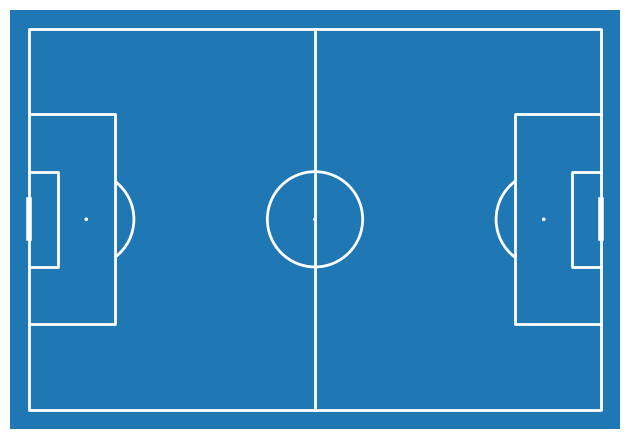

In [14]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
# pitch = Pitch(pitch_color='grass', line_color='white', stripe=True)
pitch = Pitch(pitch_color='#1f77b4', 
              line_color='white', 
              stripe=False,
              pitch_type = 'statsbomb',
              )
fig, ax = pitch.draw()
plt.show()

In [15]:
80/7

11.428571428571429

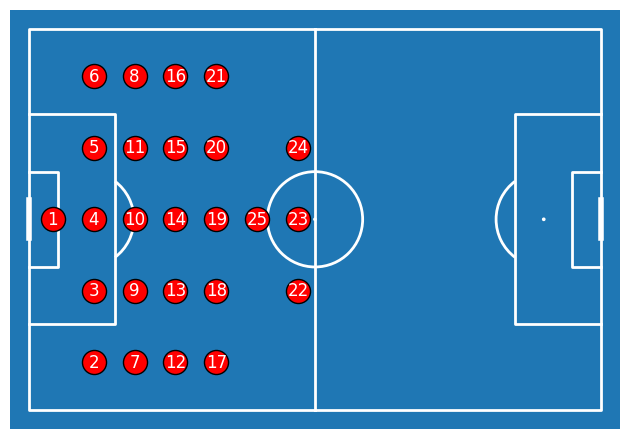

In [16]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

pitch_width = 120
pitch_height = 80
nb_line = 7
space_line = (pitch_width/2)/7
space_col = (pitch_height)/7

x_line1 = 5
x_line2 = x_line1 + space_line
x_line3 = x_line2 + space_line
x_line4 = x_line3 + space_line
x_line5 = x_line4 + space_line
x_line6 = x_line5 + space_line
x_line7 = x_line6 + space_line

x_col1 = 5
x_col2 = x_line1 + space_line
x_col3 = x_line2 + space_line
x_col4 = x_line3 + space_line
x_col5 = x_line4 + space_line
x_col6 = x_line5 + space_line
x_col7 = x_line6 + space_line

coordinates_dict = {
    1: (x_line1, 40),
    2: (x_line2, 70),
    3: (x_line2, 55),
    4: (x_line2, 40),
    5: (x_line2, 25),
    6: (x_line2, 10),
    7: (x_line3, 70),
    8: (x_line3, 10),
    9: (x_line3, 55),
    10: (x_line3, 40),
    11: (x_line3, 25),
    12: (x_line4, 70),
    13: (x_line4, 55),
    14: (x_line4, 40),
    15: (x_line4, 25),
    16: (x_line4, 10),
    17: (x_line5, 70),
    18: (x_line5, 55),
    19: (x_line5, 40),
    20: (x_line5, 25),
    21: (x_line5, 10),
    22: (x_line7, 55),
    23: (x_line7, 40),
    24: (x_line7, 25),
    25: (x_line6, 40)
}

# Plotting the pitch
pitch = Pitch(
    pitch_color='#1f77b4', 
    line_color='white', 
    stripe=False, 
    pitch_type='statsbomb'
)

fig, ax = pitch.draw()

# Plotting player positions as scatter points
x_coords, y_coords = zip(*coordinates_dict.values())
ax.scatter(x_coords, y_coords, color='red', s=300, edgecolors='black', zorder=5)

# Annotating player numbers
for player_num, (x, y) in coordinates_dict.items():
    ax.text(x, y, str(player_num), color='white', ha='center', va='center', fontsize=12, zorder=6)

plt.show()


In [17]:
lineups

,player_id,player_name,player_nickname,jersey_number,country,cards,positions
0,2988,Memphis Depay,None,10,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
1,3306,Nathan Aké,None,5,Netherlands,[],"[{'position_id': 6, 'position': 'Left Back', '..."
2,3311,Daley Blind,None,17,Netherlands,[],[]
3,3567,Georginio Wijnaldum,None,8,Netherlands,[],[]
4,3669,Virgil van Dijk,None,4,Netherlands,"[{'time': '86:26', 'card_type': 'Yellow Card',...","[{'position_id': 5, 'position': 'Left Center B..."
5,7787,Stefan de Vrij,None,6,Netherlands,[],"[{'position_id': 3, 'position': 'Right Center ..."
6,7829,Wout Weghorst,None,9,Netherlands,[],"[{'position_id': 23, 'position': 'Center Forwa..."
7,8069,Matthijs de Ligt,None,3,Netherlands,[],[]
8,8125,Denzel Dumfries,None,22,Netherlands,"[{'time': '13:43', 'card_type': 'Yellow Card',...","[{'position_id': 2, 'position': 'Right Back', ..."
9,8259,Steven Bergwijn,None,25,Netherlands,[],[]


In [18]:
def display_player_names_and_positions(lineups):
    for index, row in lineups.iterrows():
        player_name = row['player_name']
        # Extracting the first position ID from the positions column (assuming only one position)
        position_info = row['positions'][0] if row['positions'] else {}
        position_id = position_info.get('position_id', 'Unknown')
        print(f"Player: {player_name}, Position ID: {position_id}")

# Example usage with the provided lineups
display_player_names_and_positions(lineups)


Player: Memphis Depay, Position ID: 23
Player: Nathan Aké, Position ID: 6
Player: Daley Blind, Position ID: Unknown
Player: Georginio Wijnaldum, Position ID: Unknown
Player: Virgil van Dijk, Position ID: 5
Player: Stefan de Vrij, Position ID: 3
Player: Wout Weghorst, Position ID: 23
Player: Matthijs de Ligt, Position ID: Unknown
Player: Denzel Dumfries, Position ID: 2
Player: Steven Bergwijn, Position ID: Unknown
Player: Jerdy Schouten, Position ID: 9
Player: Donyell Malen, Position ID: 17
Player: Justin Bijlow, Position ID: Unknown
Player: Cody Mathès Gakpo, Position ID: 21
Player: Tijjani Reijnders, Position ID: 11
Player: Joey Veerman, Position ID: 23
Player: Brian Brobbey, Position ID: 17
Player: Lutsharel Geertruida, Position ID: Unknown
Player: Ryan Gravenberch, Position ID: Unknown
Player: Mark Flekken, Position ID: Unknown
Player: Micky van de Ven, Position ID: Unknown
Player: Jeremie Frimpong, Position ID: Unknown
Player: Joshua Zirkzee, Position ID: 2
Player: Bart Verbruggen,

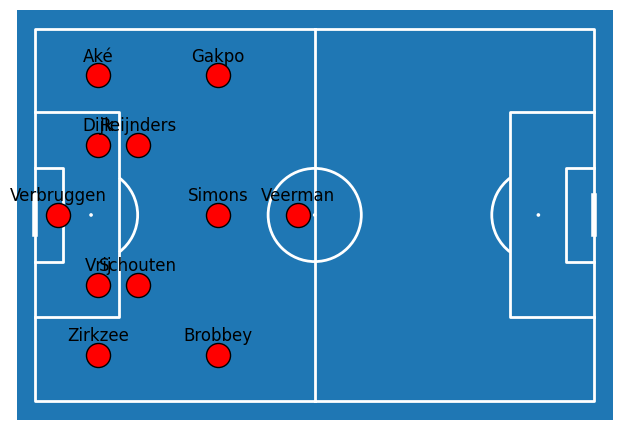

In [19]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt

# Assuming the position IDs map to coordinates like this:
position_id_to_coordinates = {
    1: (x_line1, 40),
    2: (x_line2, 70),
    3: (x_line2, 55),
    4: (x_line2, 40),
    5: (x_line2, 25),
    6: (x_line2, 10),
    7: (x_line3, 70),
    8: (x_line3, 10),
    9: (x_line3, 55),
    10: (x_line3, 40),
    11: (x_line3, 25),
    12: (x_line4, 70),
    13: (x_line4, 55),
    14: (x_line4, 40),
    15: (x_line4, 25),
    16: (x_line4, 10),
    17: (x_line5, 70),
    18: (x_line5, 55),
    19: (x_line5, 40),
    20: (x_line5, 25),
    21: (x_line5, 10),
    22: (x_line7, 55),
    23: (x_line7, 40),
    24: (x_line7, 25),
    25: (x_line6, 40)
}


def display_player_names_and_positions(lineups):
    coordinates_dict = {}
    player_names_dict = {}
    
    for index, row in lineups.iterrows():
        player_name = row['player_name']
        # Extracting the first position ID from the positions column
        position_info = row['positions'][0] if row['positions'] else {}
        position_id = position_info.get('position_id', 'Unknown')
        
        if position_id in position_id_to_coordinates:
            coordinates_dict[position_id] = position_id_to_coordinates[position_id]
            player_names_dict[position_id] = player_name
    
    # Plotting the pitch
    pitch = Pitch(
        pitch_color='#1f77b4', 
        line_color='white', 
        stripe=False, 
        pitch_type='statsbomb'
    )

    fig, ax = pitch.draw()

    # Plotting player positions as scatter points
    x_coords, y_coords = zip(*coordinates_dict.values())
    ax.scatter(x_coords, y_coords, color='red', s=300, edgecolors='black', zorder=5)

    # Annotating player names and position IDs
    for position_id, (x, y) in coordinates_dict.items():
        name = player_names_dict.get(position_id, "Unknown")
        ax.text(x, y - 4, f'{name.split()[-1]}', color='black', ha='center', va='center', fontsize=12, zorder=6)

    plt.show()

# Example usage with the provided lineups
display_player_names_and_positions(lineups)
